**Découverte jeux de données**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# ACP
import sklearn.decomposition as sd
import sklearn.preprocessing as sp

# Plot et Display
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style("whitegrid")


In [26]:
path = "../Donnees_projet/Ensemble_apprentissage/"
#path = "Ensemble de test/"

In [35]:
files = os.listdir(path)
nb_series = len(files)

In [28]:
serie_1 = pd.read_csv(path + files[0], index_col=0)
serie_1.head()

,TIMESTAMP,FF_1
0,2012-11-06T18:49:35.505,1416.0
1,2012-11-06T18:49:36.505,1416.0
2,2012-11-06T18:49:37.505,1416.0
3,2012-11-06T18:49:38.505,1416.0
4,2012-11-06T18:49:39.505,1424.0


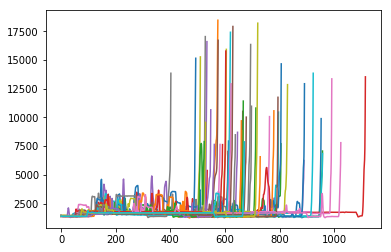

In [32]:
for i in range(0,50) :
    data = pd.read_csv(path + files[i])
    plt.plot(data["FF_1"])
plt.show()

Longueur des séries :

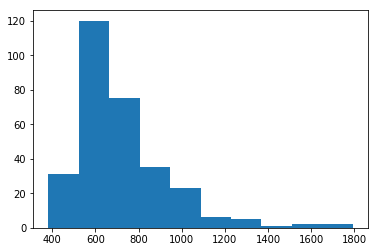

In [30]:
long = [pd.read_csv(path + file).shape[0] for file in files]
plt.hist(long)
plt.show()

In [50]:
# Coefficients fft : 

from scipy.fftpack import fft

isignal = 0
print(" signal " + SIGNALS[isignal])
X_signal = np.vstack([x[:,isignal] for x in X])

#print(amplitudefft)
#plt.plot(amplitudefft)

fftCoeff = []

for x in X_signal :
    
    mx=np.mean(x)
    x_centre=x-mx
   #Apply fast Fourier transform
    coeffsfft=np.abs(fft(x_centre))  
    coeffsfft_flatten = np.hstack(coeffsfft)
    fftCoeff.append(coeffsfft_flatten)
        
fftCoeff = np.array(fftCoeff)

# Il suffit de garder la moitié des coefficients (ils sont ensuite répétés  de manière symétrique)

fftCoeff=fftCoeff[:,:64]
print(fftCoeff.shape)
print(np.sum(fftCoeff!=0))

NameError: name 'SIGNALS' is not defined

Idée : vstack les signaux puis parcourir pour attraper les coeffs de Fourier

In [44]:
X_signal = [list(pd.read_csv(path + files[num])["FF_1"]) for num in range(nb_series)]
#print(X_signal)  # On a une liste de listes, chaque liste est une série de données

In [56]:
fftCoeff = []

for x in X_signal :
    #plt.plot(x)
    #plt.show()
    mx = np.mean(x)
    x_centre = x - mx
   #Apply fast Fourier transform
    coeffsfft = np.abs(fft(x_centre))  
    coeffsfft_flatten = np.hstack(coeffsfft)
    fftCoeff.append(coeffsfft_flatten)
        
fftCoeff = np.array(fftCoeff)

# Il suffit de garder la moitié des coefficients (ils sont ensuite répétés  de manière symétrique)

fftCoeff=fftCoeff[:][:64]
print(fftCoeff.shape)
print(np.sum(fftCoeff!=0))

(300,)
1


/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


Problème : toutes les séries font pas la même longueur, donc faut seuiller pour en garder un nombre fixe. On teste en en gardant autant que possible, ie autant que la longueur de la plus longue série. Pour les autres, on garde les plus grands coefficients ordonnés.

In [67]:
longueur_max = min([len(x) for x in fftCoeff])

In [60]:
print(np.array(fftCoeff[0]))

[9.09494702e-11 4.45397827e+04 3.21938874e+04 2.99960897e+04
 2.42543453e+04 2.71077446e+04 2.75801248e+04 1.13390131e+04
 3.17220975e+04 3.43869360e+04 3.63002230e+04 3.92374452e+04
 4.33917458e+04 8.48816980e+04 3.38423174e+04 1.65997379e+04
 3.53744852e+04 3.09446733e+04 2.99663858e+04 5.63461816e+04
 2.44142011e+04 3.88470833e+04 3.73765514e+04 3.26740625e+04
 3.98822042e+04 2.97380021e+04 6.10176226e+04 2.48528721e+04
 1.65163434e+04 3.28808257e+04 2.91672192e+04 3.36945421e+04
 6.58101544e+04 2.71790303e+04 2.87609240e+04 3.75134659e+04
 3.46053630e+04 4.02070172e+04 1.81065948e+04 3.99072099e+04
 2.43603353e+04 2.24282086e+04 1.51524804e+04 3.33171145e+04
 3.65116902e+04 6.28512841e+04 2.30645298e+04 1.89431654e+04
 3.22454460e+04 3.19134763e+04 3.33198661e+04 2.08121189e+04
 2.35116025e+04 2.04110927e+04 2.15104893e+04 3.54229597e+03
 3.60379890e+04 3.16653315e+04 5.05508048e+04 1.70002111e+04
 1.38054769e+04 2.18717604e+04 3.01109248e+04 3.18344646e+04
 3.05024247e+04 1.768943

In [78]:
liste = [1,10,2,30,25,3,58,0,24,20,7]
print(liste)
seuil = [x for x in liste if x >= np.sort(liste)[-5]]
print(seuil)

[1, 10, 2, 30, 25, 3, 58, 0, 24, 20, 7]
[30, 25, 58, 24, 20]


In [117]:
coeffs_seuil = np.array([x for x in liste if x >= np.sort(liste)[5] for coeff in fftCoeff])

coeffs_seuil = np.zeros((0, longueur_max))

for coeffs in fftCoeff :
    c = [x for x in coeffs if x >= np.sort(coeffs)[-longueur_max]][:longueur_max]
    coeffs_seuil = np.vstack((coeffs_seuil, c))

In [91]:
acp = sd.PCA()
X_acp_fft = acp.fit_transform(sp.scale(coeffs_seuil))


Text(0.5,1,'Distribution des premieres composantes')

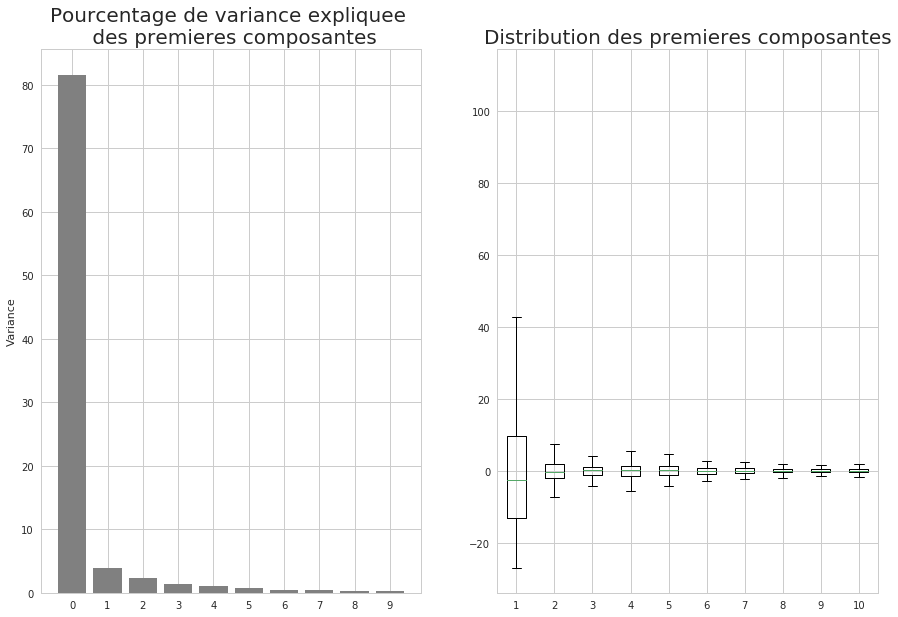

In [104]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.bar(range(10), acp.explained_variance_ratio_[:10]*100, align='center',
        color='grey', ecolor='black')
ax.set_xticks(range(10))
ax.set_ylabel("Variance")
ax.set_title("Pourcentage de variance expliquee \n des premieres composantes", fontsize=20)

ax = fig.add_subplot(1,2,2)
box=ax.boxplot(X_acp_fft[:,0:10])
ax.set_title("Distribution des premieres composantes", fontsize=20)

No handles with labels found to put in legend.


Text(0.5,1,'Projection des features sur les \n  deux premieres composantes')

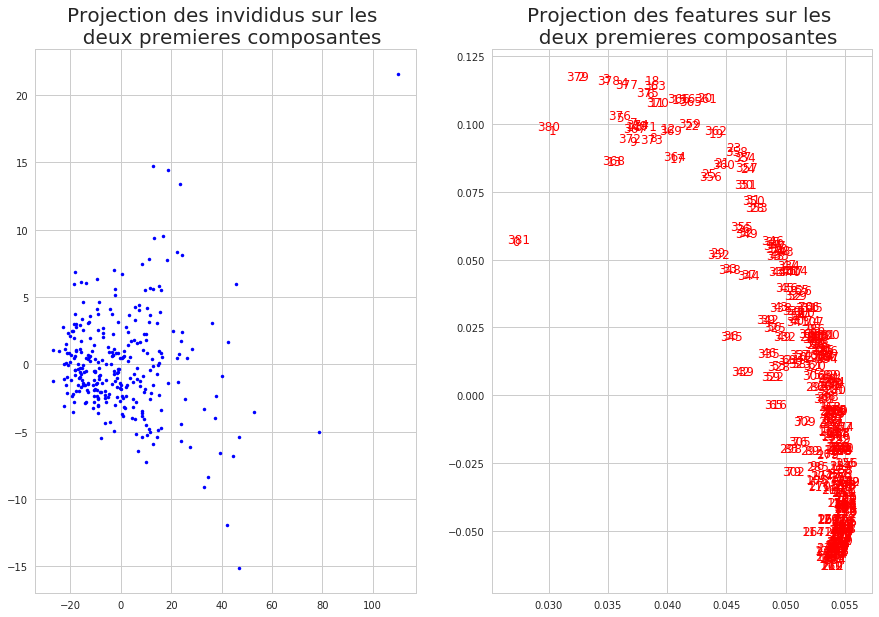

In [115]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
labels=[]
for x,y,s in zip(X_acp_fft[:,0], X_acp_fft[:,1], map(str,range(longueur_max))):
    ax.plot(x,y,marker=".", color="blue")

       
plt.legend(fontsize=15)
ax.set_title("Projection des invididus sur les \n  deux premieres composantes", fontsize=20)


ax = fig.add_subplot(1,2,2)
for x,y,s in zip(acp.components_[0], acp.components_[1], map(str,range(longueur_max))):
    ax.text(x,y,s, horizontalalignment="center", verticalalignment="center", color="red")
    
ax.set_xlim(acp.components_[0].min()-0.002,acp.components_[0].max()+0.002)
ax.set_ylim(acp.components_[1].min()-0.01,acp.components_[1].max()+0.01)
ax.set_title("Projection des features sur les \n  deux premieres composantes", fontsize=20)
